# Иницилизация

In [34]:
import numpy as np

# maps=np.load("./Task19.npy")
# print("Исходная матрица:","\n")
# maps = np.where(maps!=0,maps,1)
# print(maps)

maps=np.ones([100,100])

for i in range(0,100):
    for j in range(0,100):
        if (i<j):
            maps[i,j]=np.random.randint(1,100)
            maps[j,i]= maps[i,j]
            
print(np.shape(maps))
print(maps)

(100, 100)
[[ 1.  5. 12. ... 34. 49. 98.]
 [ 5.  1. 90. ... 22. 15. 34.]
 [12. 90.  1. ... 97.  2. 44.]
 ...
 [34. 22. 97. ...  1. 93. 28.]
 [49. 15.  2. ... 93.  1. 89.]
 [98. 34. 44. ... 28. 89.  1.]]


# Выбор маршрута, рандомом

In [11]:
import random
import time        

def getRandomTrace(maps):
    trace=[1] 
    cities=[]
    pathLenght = 0
    for i in range(2,100):
        cities.append(i)
    cnt=1
    gratedMass=[int(1e10)]
    start=time.perf_counter()
    while cnt !=  np.math.factorial(100):
        cnt+=1
        if len(cities)>0:
            nextStep=random.choice(cities)
            pathLenght+=maps.item(trace[-1]-1,nextStep-1)
            trace.append(nextStep)
            cities.remove(nextStep)
            """print("Длина пути: ",pathLenght)
            print("Пройденный маршрут: ",trace)
            print("Оставшиеся города: ",cities)"""
        else:
            pathLenght+=maps.item(trace[-1]-1,0)
            if pathLenght<gratedMass[-1]:
                gratedMass.append(pathLenght)
            gratedMass.sort()
            if len(gratedMass)>5:
                gratedMass.pop()
            #print(pathLenght)
            pathLenght = 0
            trace=[1]
            for i in range(2,100):
                cities.append(i)
#             cities=[2,3,4,5,6,7,8,9,10]
    end = time.perf_counter()
    print("Затраченное время:",end-start)
    print("Массив минимальных путей: ",gratedMass)
    
getRandomTrace(maps)    

KeyboardInterrupt: 

# Время выбора перебором равно 4,120 с

# Базова реализация алгоритма

In [68]:


def getP_1(i,pher,n,cities,alfa,beta):

    p=[]
    summa=0
    i-=1
    for x in cities:
        x-=1
        summa+=pher[i,x]**alfa*n[i,x]**beta
#     print("Summa: ",summa)
#     print("Cities: ",cities)
    for x in cities:
        try:
            x-=1
            p.append((pher.item(i,x)**alfa*n.item(i,x)**beta)/(summa))
        except ZeroDivisionError:
            p.append(1)
    return p

def getNextCity_1(p):
    point=np.random.randint(0,100)/100
#     print("probability: ",p)
#     print("Summa: ",summa)
#     print("Point: ",point)
    delta=0
    for i in p:
        delta+=i
        if delta>point:
            cityIndex = p.index(i)
#             print("Delta: ",delta)
#             print("NextCity: ",cityIndex)
            break
    try:
        return cityIndex
    except UnboundLocalError:
        return -1


def ANT_General(numberOfAnts,numberOfIterations,alfa,beta):
    import numpy as np
    import time 
#     print("Процесс начат")
    
    minLenght=int(1e10)
    start=time.perf_counter()
    
#     trace=[1]
#     cities=[2,5,4,3,7,6,8,9,10]
    cities=[]
    trace=[np.random.randint(1,10)]
#     cities=[1,2,5,4,3,7,6,10,9,8]

    for i in range(1,101):
                cities.append(i)
    cities.remove(trace[-1])
    
    pheromons=np.full((100,100),0.1)
    n=np.where(maps!=1,1/maps,1)
    

    Q=1000;
    speed=0.1
    
    for it in range(0,numberOfIterations):
#         print("Номер итерации:",it)
        paths=[]
        for a in range(1,numberOfAnts+1):
#             print("Номер муравья:",a)
            while len(cities)>0:
                probability=getP_1(trace[-1],pheromons,n,cities,alfa,beta)
                indexOfNextCity=getNextCity_1(probability)
#                 print("Next city: ",cities[indexOfNextCity])
                trace.append(cities[indexOfNextCity])
                cities.pop(indexOfNextCity)
#                 print("Пройденный маршрут: ",trace)
#                 print("Оставшиеся города: ",cities)
            paths.append(trace)
#             trace=[1]
#             cities=[2,5,4,3,7,6,8,9,10]
            trace=[np.random.randint(1,10)]
#             cities=[1,2,5,4,3,7,6,10,9,8]
#             cities.remove(trace[-1])
            for i in range(1,100):
                cities.append(i)
            cities.remove(trace[-1])
#         for p in paths:
#             print(p)
#         print(len(paths[0]))
        evaporation=lambda x: speed*x
        pheromons=np.vectorize(evaporation)(pheromons)
        
        #Рассчет маршрута
        lenghts=[]
        
        for p in paths:
            lenght=0
            counter=-1
#             print("-------")
            for l in p:
                counter+=1
#                 print(counter)
                if (counter)<98:
#                     print(l,p[counter+1])
                    lenght+=maps.item(l-1,p[counter+1]-1)
                else:
#                     print(l,p[0])
                    lenght+=maps.item(l-1,p[0]-1)
                
            lenghts.append(lenght)
#         print(lenghts)
#         print("Феромоны до")
#         print(np.round(pheromons,1))
        #Обновление феормона на путях
        for l in lenghts:
            counter=-1
            p=paths[lenghts.index(l)]
            for m in paths[lenghts.index(l)]:
                counter+=1
                if (counter)<98:
#                     print(counter)
                    np.add.at(pheromons,(m-1,p[counter+1]-1),Q/l)
                    np.add.at(pheromons,(p[counter+1]-1,m-1),Q/l)
                else:
                    np.add.at(pheromons,(p[0]-1,m-1),Q/l)
                    np.add.at(pheromons,(m-1,p[0]-1),Q/l)
#         print("Феромоны после: ")
#         print(np.round(pheromons,1))
#         print(n)
        for l in lenghts:
            if l<minLenght:
                minLenght=l
                
        if minLenght<370:
            end=time.perf_counter() 
            break
        else: 
            end=time.perf_counter() 
            
    
        
#     return (end-start)
     
    end=time.perf_counter()       
    T=(end-start)
    print("T= ",T,"c")
    print(minLenght)
    print(lenghts)
    print(paths)
    print(np.round(pheromons,1))
    
                                   
ANT_General(10,1000,1,5)  

                
            

T=  1.456157815000097 c
367.0
[503.0, 491.0, 612.0, 614.0, 367.0, 640.0, 577.0, 546.0, 539.0, 613.0]
[[7, 17, 75, 41, 74, 87, 76, 60, 72, 26, 86, 54, 16, 77, 6, 91, 30, 71, 37, 2, 97, 98, 21, 57, 15, 52, 51, 31, 43, 32, 84, 24, 13, 69, 10, 63, 50, 61, 22, 78, 19, 59, 48, 36, 53, 68, 45, 49, 56, 66, 94, 35, 58, 11, 25, 1, 12, 95, 79, 38, 8, 89, 67, 47, 55, 83, 28, 3, 99, 4, 44, 39, 5, 64, 73, 62, 40, 88, 80, 65, 42, 81, 9, 96, 23, 27, 93, 92, 70, 90, 18, 14, 34, 29, 33, 85, 82, 46, 20], [4, 99, 81, 9, 26, 86, 54, 16, 77, 6, 91, 30, 23, 61, 22, 78, 19, 59, 48, 36, 53, 68, 45, 49, 56, 66, 84, 80, 88, 40, 76, 60, 72, 18, 90, 7, 17, 75, 41, 74, 87, 44, 67, 47, 55, 24, 13, 64, 73, 8, 38, 79, 65, 42, 25, 1, 12, 95, 50, 63, 10, 69, 34, 29, 97, 98, 21, 57, 15, 52, 51, 31, 43, 32, 2, 37, 71, 5, 39, 11, 58, 35, 94, 20, 46, 82, 85, 83, 3, 28, 93, 27, 92, 70, 96, 14, 33, 62, 89], [2, 97, 98, 21, 57, 15, 52, 51, 31, 43, 1, 25, 11, 39, 5, 64, 73, 53, 68, 45, 49, 56, 66, 84, 80, 88, 40, 62, 35, 94, 20

# Построение графика зависимости времени выполнения базовой реазизации алгоритма от альфа и бета

/home/aidar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


Минимальное значение времени:  0.001349453999864636
Максимальное значение времени:  1.975494338000317


<IPython.core.display.Javascript object>


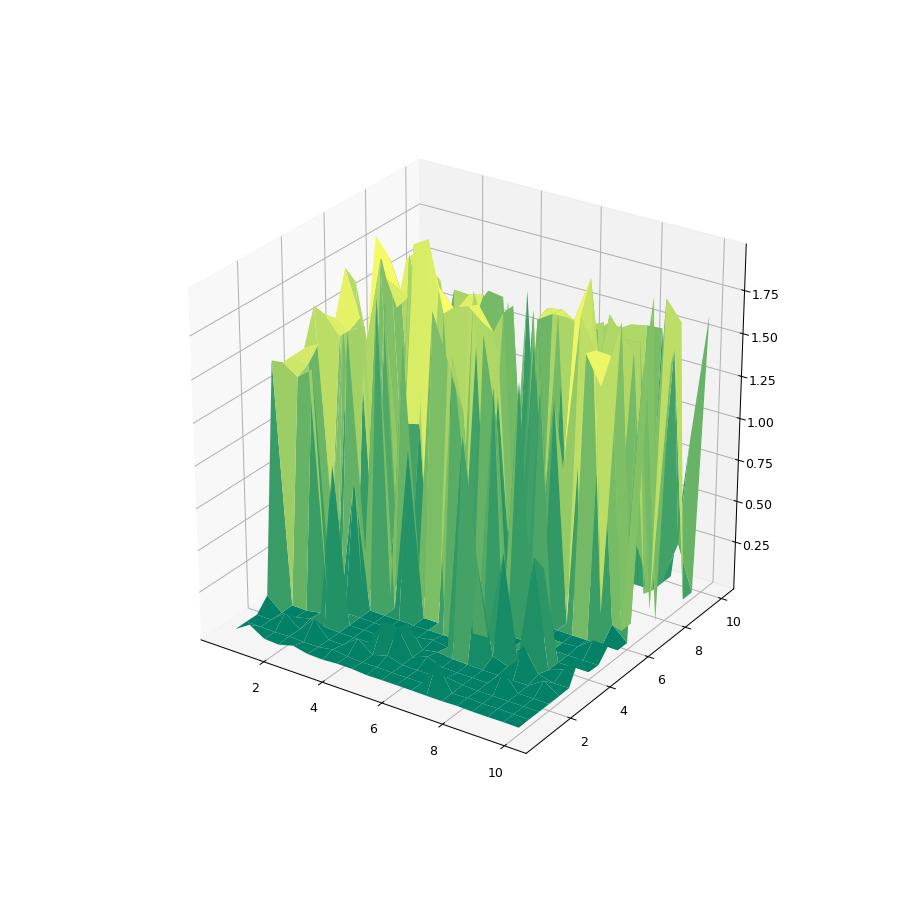

In [55]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib notebook
#Отображение поверхности
xval=np.linspace(0.5,10,20)
yval=np.linspace(0.5,10,20)
#print(xval)
x,y = np.meshgrid(xval,yval)
# print(x)
# print(y)
z=np.zeros((np.size(x,1),np.size(y,1)))
counterx=-1
for i in xval:
    counterx+=1
    countery=-1
    for j in yval:
        countery+=1
#         print(counterx,countery)
        z[counterx,countery]=ANT_General(10,1000,i,j)
    
print("Минимальное значение времени: ", np.amin(z))
print("Максимальное значение времени: ", np.amax(z))

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
surf = ax.plot_surface(x, y, z, cmap='summer', rstride=1, cstride=1, alpha=None, antialiased=True)

    

# Элитные муравьиные системы

In [64]:


def getP_2(i,pher,n,cities,alfa,beta):
    
    p=[]
    summa=0
    i-=1
    for x in cities:
        x-=1
        summa+=pher.item(i,x)**alfa*n.item(i,x)**beta
    for x in cities:
        try:
            x-=1
            p.append((pher.item(i,x)**alfa*n.item(i,x)**beta)/(summa))
        except ZeroDivisionError:
            p.append(1)
    return p

def getNextCity_2(p):
    point=np.random.randint(0,100)/100
    delta=0
    for i in p:
        delta+=i
        if delta>point:
            cityIndex = p.index(i)
            break
    return cityIndex            

def ANT_Elite(numberOfAnts,numberOfIterations,alfa,beta,speed):
    import numpy as np
    import time 
#     print("Процесс начат")
    
    minLenght=int(1e10)
    start=time.perf_counter()
    cities=[]
#     trace=[1]
#     cities=[2,5,4,3,7,6,8,9,10]
    
    trace=[np.random.randint(1,10)]
#     cities=[1,2,5,4,3,7,6,8,9,10]
#     cities.remove(trace[-1])
    for i in range(1,101):
        cities.append(i)
    cities.remove(trace[-1])

    pheromons=np.full((100,100),1)
    n=np.where(maps!=1,1/maps,1)
    

    Q=1000;
    
    
    for it in range(0,numberOfIterations):
        paths=[]
        for a in range(1,numberOfAnts+1):
            while len(cities)>0:
                probability=getP_2(trace[-1],pheromons,n,cities,alfa,beta)
                indexOfNextCity=getNextCity_2(probability)
                trace.append(cities[indexOfNextCity])
                cities.pop(indexOfNextCity)
            paths.append(trace)
#             trace=[1]
#             cities=[2,5,4,3,7,6,8,9,10]
            trace=[np.random.randint(1,10)]
#             cities=[1,2,5,4,3,7,6,8,9,10]
#             cities.remove(trace)
            for i in range(1,101):
                cities.append(i)
            cities.remove(trace[-1])
#         for p in paths:

        
        evaporation=lambda x: speed*x
        pheromons=np.vectorize(evaporation)(pheromons)
        
        #Рассчет маршрута
        lenghts=[]
        for p in paths:
            lenght=0
            counter=-1
            for l in p:
                counter+=1
                if (counter)<98:
                    lenght+=maps.item(l-1,p[counter+1]-1)
                else:
                    lenght+=maps.item(l-1,p[0]-1)  
            lenghts.append(lenght)
        minLenght=1000000   
        for l in lenghts:
            if l<minLenght:
                minLenght=l   
#         print(lenghts)
#         print(minLenght)
#         print("Феромоны до: ")
#         print(np.round(pheromons,2))
        #Обновление феромона на путях для элитных муравьев
        counter=-1
        for m in paths[lenghts.index(minLenght)]:
            p=paths[lenghts.index(minLenght)]
            counter+=1
            if (counter)<98:
                np.add.at(pheromons,(m-1,p[counter+1]-1),Q/minLenght)
                np.add.at(pheromons,(p[counter+1]-1,m-1),Q/minLenght)
            else:
                np.add.at(pheromons,(p[0]-1,m-1),Q/minLenght)
                np.add.at(pheromons,(m-1,p[0]-1),Q/minLenght)
#         print("Феромоны после: ")
#         print(np.round(pheromons,1))

        
        #Ограничение феормонов
        pheromons=np.where(pheromons > 1 ,pheromons,1)
        pheromons=np.where(pheromons < 20 ,pheromons,20)
        
        if minLenght<370:
            end=time.perf_counter() 
            break
        else: 
            end=time.perf_counter()
            
#     print(minLenght)

#     return (end-start)
            
    end=time.perf_counter()
    T=(end-start)
    print("T= ",T,"c")        
    print(minLenght)
    print(lenghts)
#     for p in paths:
#         print(p)
    print(np.round(pheromons,1))
    
    
                                   
ANT_Elite(100,1000,1,5,0.8) 



T=  2.743812223000077 c
361.0
[651.0, 473.0, 540.0, 549.0, 474.0, 452.0, 469.0, 605.0, 636.0, 588.0, 657.0, 491.0, 613.0, 528.0, 559.0, 590.0, 627.0, 603.0, 581.0, 581.0, 499.0, 451.0, 500.0, 631.0, 510.0, 495.0, 502.0, 617.0, 739.0, 464.0, 699.0, 494.0, 528.0, 705.0, 613.0, 446.0, 662.0, 582.0, 533.0, 505.0, 422.0, 643.0, 601.0, 696.0, 418.0, 659.0, 789.0, 685.0, 440.0, 732.0, 646.0, 520.0, 618.0, 455.0, 637.0, 590.0, 549.0, 476.0, 548.0, 415.0, 581.0, 521.0, 574.0, 500.0, 631.0, 599.0, 480.0, 537.0, 531.0, 571.0, 555.0, 682.0, 489.0, 554.0, 516.0, 443.0, 662.0, 590.0, 567.0, 594.0, 634.0, 414.0, 603.0, 542.0, 551.0, 578.0, 554.0, 582.0, 583.0, 568.0, 519.0, 575.0, 361.0, 546.0, 566.0, 665.0, 536.0, 573.0, 569.0, 533.0]


# Построение графика зависимости времени выполнения элитной реазизации алгоритма от параметра p

Минимальное значение времени:  0.007994495000275492
Максимальное значение времени:  0.012345754000307352


<IPython.core.display.Javascript object>


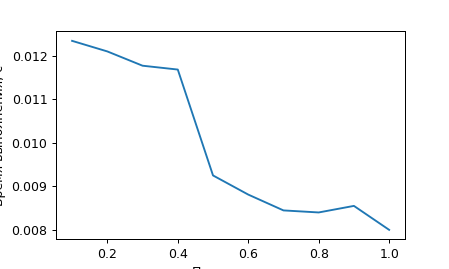

Text(0.5, 0, 'Параметр р')

In [83]:

import matplotlib.pyplot as plt
%matplotlib notebook
#Отображение поверхности
xval=np.linspace(0.1,1,10)
yval=[]
for i in xval:
    yval.append(ANT_Elite(100,1000,1,5,i))
    
print("Минимальное значение времени: ", np.amin(yval))
print("Максимальное значение времени: ", np.amax(yval))

fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(xval,yval)
ax.set_ylabel('Время выполнения, с')
ax.set_xlabel('Параметр р')


# Алгоритм муравьиной колонии

In [90]:
def getP_3(i,pher,n,cities,flag,alfa,beta):
    alfa=3
    beta=5
    
    p=[]
    summa=0
    i-=1
    if flag:
        for x in cities:
            x-=1
            summa+=pher.item(i,x)**alfa*n.item(i,x)**beta
        for x in cities:
            try:
                x-=1
                p.append((pher.item(i,x)**alfa*n.item(i,x)**beta)/(summa))
            except ZeroDivisionError:
                p.append(1)
    else:
        for x in cities:
            x-=1
            p.append(pher.item(i,x))
    return p

def getNextCity_3(p,flag):
    if flag:
        point=np.random.randint(0,100)/100
        delta=0
        for i in p:
            delta+=i
            if delta>point:
                cityIndex = p.index(i)
                break

    else:
        maxP=-1
        for i in p:
            if i>maxP:
                maxP=i
#         print(p.index(maxP))
        cityIndex = p.index(maxP)
    return cityIndex            
            
            
def ANT_third(numberOfAnts,numberOfIterations,alfa,beta,fi):
    import numpy as np
    import time 
#     print("Процесс начат")
    
    minLenght=int(1e10)
    start=time.perf_counter()
    
#     trace=[1]
#     cities=[2,5,4,3,7,6,8,9,10]
    
    trace=[np.random.randint(1,10)]
    cities=[1,2,5,4,3,7,6,8,9,10]
    cities.remove(trace[-1])
    
    initial=1

    pheromons=np.full((10,10),initial)
    n=np.where(maps!=1,1/maps,1)
    onesMatrix=np.ones([10,10])

    Q=10000;
    speed=1
    
    for it in range(0,numberOfIterations):
        paths=[]
        for a in range(1,numberOfAnts+1):
            while len(cities)>0:
                if np.random.random()>0.5:
                    probability=getP_3(trace[-1],pheromons,n,cities,True,alfa,beta)
                    indexOfNextCity=getNextCity_3(probability,True)
                    trace.append(cities[indexOfNextCity])
                    cities.pop(indexOfNextCity)
                else:
                    probability=getP_3(trace[-1],pheromons,onesMatrix,cities,False,alfa,beta)
                    indexOfNextCity=getNextCity_3(probability,False)
                    trace.append(cities[indexOfNextCity])
                    cities.pop(indexOfNextCity)
            paths.append(trace[-1])
            
            #Обновление феромнов после каждого прохода муравья
            counter=-1
            for m in paths[-1]:
                p=paths[-1]
                counter+=1
                if (counter)<9:
                    pheromons[m-1,p[counter+1]-1]=(1-fi)*pheromons[m-1,p[counter+1]-1]+fi*initial
                    pheromons[m-1,p[0]-1]=(1-fi)*pheromons[m-1,p[0]-1]+fi*initial
#                     np.where(pheromons==pheromons.item(m-1,p[counter+1]-1),(1-fi)*pheromons,pheromons)
#                     np.where(pheromons==pheromons.item(p[counter+1]-1,m-1),(1-fi)*pheromons,pheromons)
#                     np.add.at(pheromons,(m-1,p[counter+1]-1),fi*initial)
#                     np.add.at(pheromons,(p[counter+1]-1,m-1),fi*initial\)
                else:
                    pheromons[p[0]-1,m-1]=(1-fi)*pheromons[p[0]-1,m-1]+fi*initial
                    pheromons[m-1,p[0]-1]=(1-fi)*pheromons[m-1,p[0]-1]+fi*initial
#                     np.where(pheromons==pheromons.item(p[0]-1,m-1),(1-fi)*pheromons,pheromons)
#                     np.where(pheromons==pheromons.item(m-1,p[0]-1),(1-fi)*pheromons,pheromons)
#                     np.add.at(pheromons,(p[0]-1,m-1),Q/minLenght)
#                     np.add.at(pheromons,(m-1,p[0]-1),Q/minLenght)
            
            
#             trace=[1]
#             cities=[2,5,4,3,7,6,8,9,10]
            trace=[np.random.randint(1,10)]
            cities=[1,2,5,4,3,7,6,8,9,10]
            cities.remove(trace[-1])

        evaporation=lambda x: speed*x
        pheromons=np.vectorize(evaporation)(pheromons)
        
        #Рассчет маршрута
        lenghts=[]
        for p in paths:
            lenght=0
            counter=-1
            for l in p:
                counter+=1
                if (counter)<9:
                    lenght+=maps.item(l-1,p[counter+1]-1)
                else:
                    lenght+=maps.item(l-1,p[0]-1)  
            lenghts.append(lenght)
        minLenght=1000   
        for l in lenghts:
            if l<minLenght:
                minLenght=l    
        #Обновление феормона на путях для элитных муравьев
        counter=-1
        for m in paths[lenghts.index(minLenght)]:
            p=paths[lenghts.index(minLenght)]
            counter+=1
            if (counter)<9:
                np.add.at(pheromons,(m-1,p[counter+1]-1),Q/minLenght)
                np.add.at(pheromons,(p[counter+1]-1,m-1),Q/minLenght)
            else:
                np.add.at(pheromons,(p[0]-1,m-1),Q/minLenght)
                np.add.at(pheromons,(m-1,p[0]-1),Q/minLenght)
#         print("Феромоны: ",pheromons)
#         print(n)
        
#         print(pheromons)
    
        if minLenght<200:
            end=time.perf_counter() 
            break
        else: 
            end=time.perf_counter() 
        
    return (end-start)
            
#     end=time.perf_counter()
#     T=(end-start)
#     print("T= ",T,"c")        
#     print(minLenght)
#     print(lenghts)
# #     for p in paths:
# #         print(p)
#     print(np.round(pheromons,2))
    
                                   
ANT_third(100,1000,1,5,0.6)  

0.06394319199989695

# Построение графика зависимости времени выполнения реазизации алгоритма муравьиной колонии от p и ф

Минимальное значение времени:  0.008423586999924737
Максимальное значение времени:  0.012803718000213848


<IPython.core.display.Javascript object>


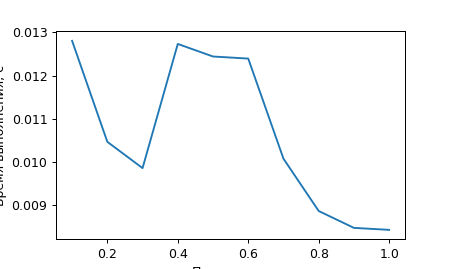

Text(0.5, 0, 'Параметр р')

In [117]:
import matplotlib.pyplot as plt
%matplotlib notebook
#Отображение поверхности
xval=np.linspace(0.1,1,10)
yval=[]
for i in xval:
    yval.append(ANT_Elite(100,1000,1,5,i))
    
print("Минимальное значение времени: ", np.amin(yval))
print("Максимальное значение времени: ", np.amax(yval))

fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(xval,yval)
ax.set_ylabel('Время выполнения, с')
ax.set_xlabel('Параметр р')



# Вывод

 В сравнении с перебором всех возможных значений, муравьиный алгоритм показал значительно лучшийы результат. В ходе исследования зависимости времени выполнения реализации алогитма от параметров алфа и бета, были определены оптимальные значения этих параметров, которые лежат в диапазоне алфа = (0:2), при этом бета=(0,10). Также зависимость выполнения алгоритма с элитными муравьями от параметра скорости испарений феромона показала, что быстрее всего алгоритм выполняется, когда этого исправения нет, то есть p=1. То же самое наблюдается и с зависимостью выполнения алгоритма муравьиной колонии от параметра фи, он должен быть равен 1.